##Aplicando habilidades obtenidas con MNE

Se muestra un poco de cómo depliega la información de un electroencefalograma usando integrales y ayudandonos de la libreria MNE


In [ ]:
!pip install mne

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%matplotlib notebook
import mne
import matplotlib.pyplot as plt

In [ ]:
fname = "OddballExampleSmallFIF.gz"

##Leer datos sin procesar, Objetos sin procesar

MNE es *orientado a objetos*. Los objetos tienen métodos correspondientes. Verifica cuáles son escribiendo `raw.` y presionando TAB:



Cargamos datos brutos de EEG o MEG desde un archivo FIF en un objeto Raw de MNE-Python, que luego se puede utilizar para realizar análisis y visualizaciones adicionales.

Por defecto, MNE no almacena los objetos crudos (raw) y de épocas (epochs) en la memoria.

In [ ]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file OddballExampleSmallFIF.gz...


<ipython-input-49-7341ee706cdd>:1: RuntimeWarning: This filename (OddballExampleSmallFIF.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


Inspeccionando datos crudos... Aquellos que no han pasado por un filtro

In [ ]:
raw.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Measurement date,"August 10, 2017 20:05:16 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"63 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,1.00 Hz
Lowpass,20.00 Hz


Usando plot podemos ver el análisis de las ondas electromagneticas que se recolectaron del EEG

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

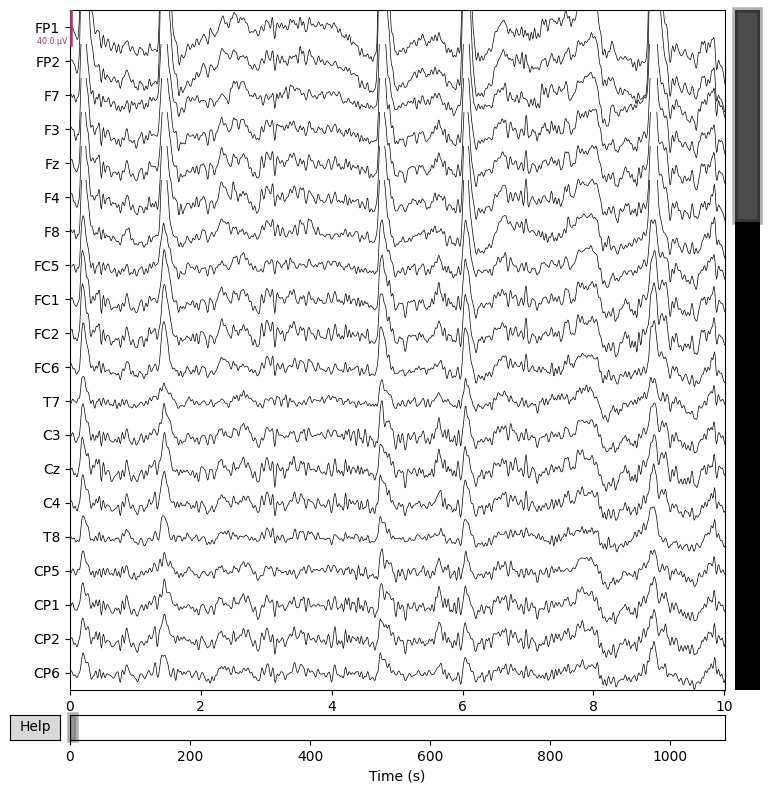

Channels marked as bad:
none
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


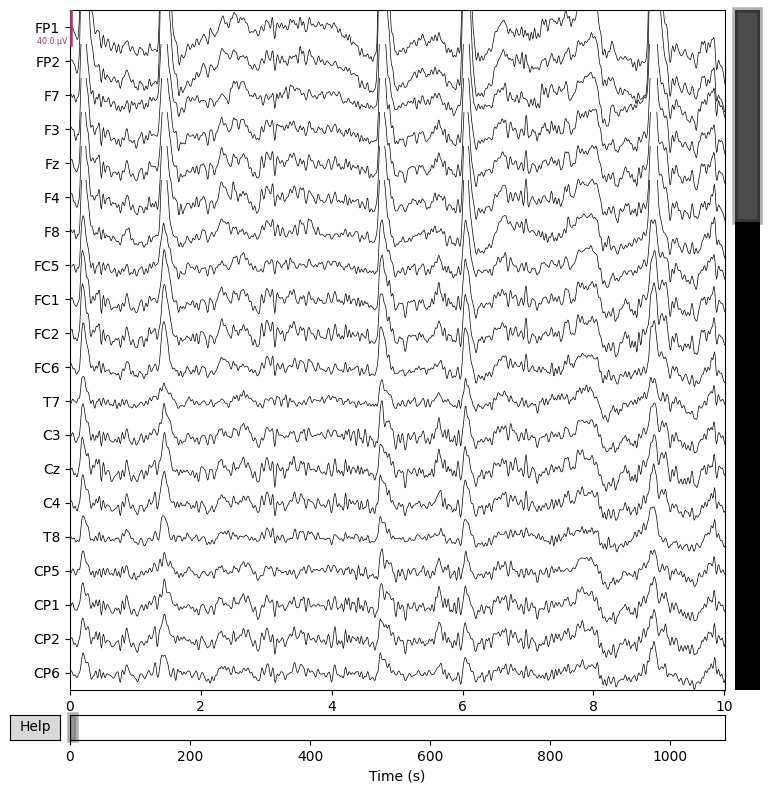

In [ ]:
raw.plot()

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [ ]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 13.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,53 iterations on raw data (109098 samples)
ICA components,20
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


La visualización generada mostrará los componentes independientes junto con información relevante, como varianza explicada, topografía y otras métricas.


Esto permite a los investigadores identificar y evaluar componentes que puedan representar artefactos, como movimientos oculares o actividad muscular, para su posible eliminación.

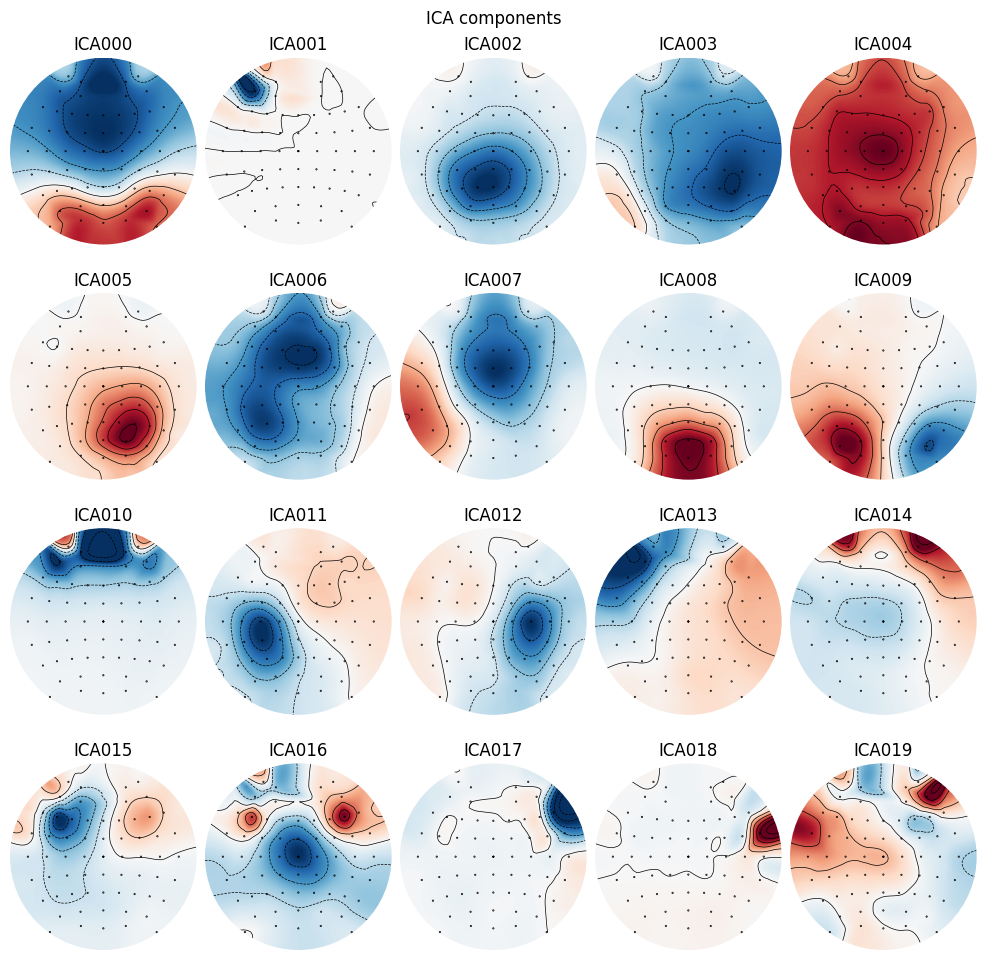

In [ ]:
ica.plot_components();

Almacenamos componentes "malos" en el objeto ICA.

In [ ]:
ica.exclude = [1, 10, 14, 17, 18, 19]

También podríamos utilizar uno de los algoritmos automáticos...

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Comparemos datos crudos y corregidos...

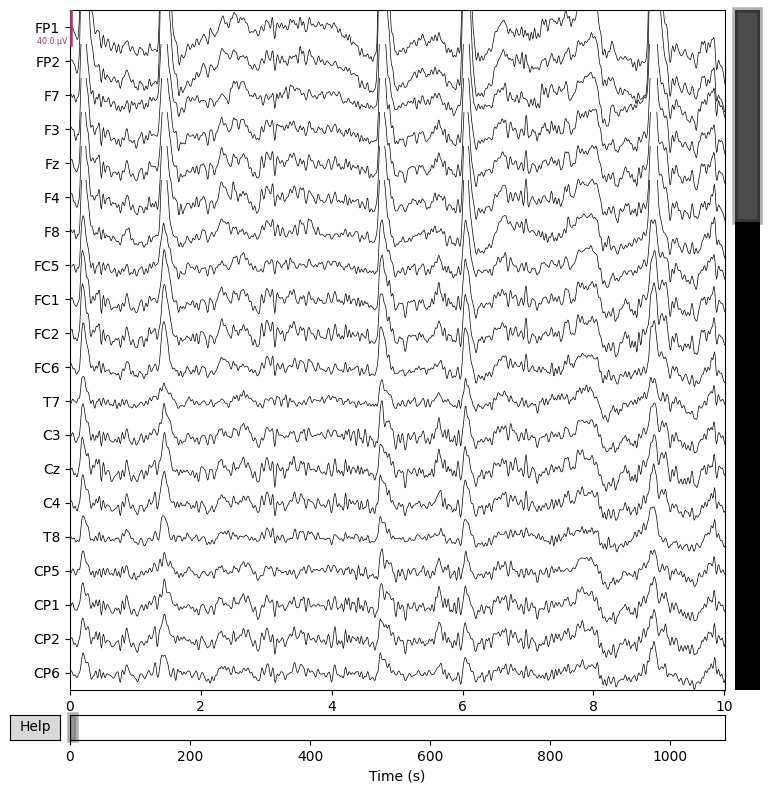

In [ ]:
raw.plot();

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


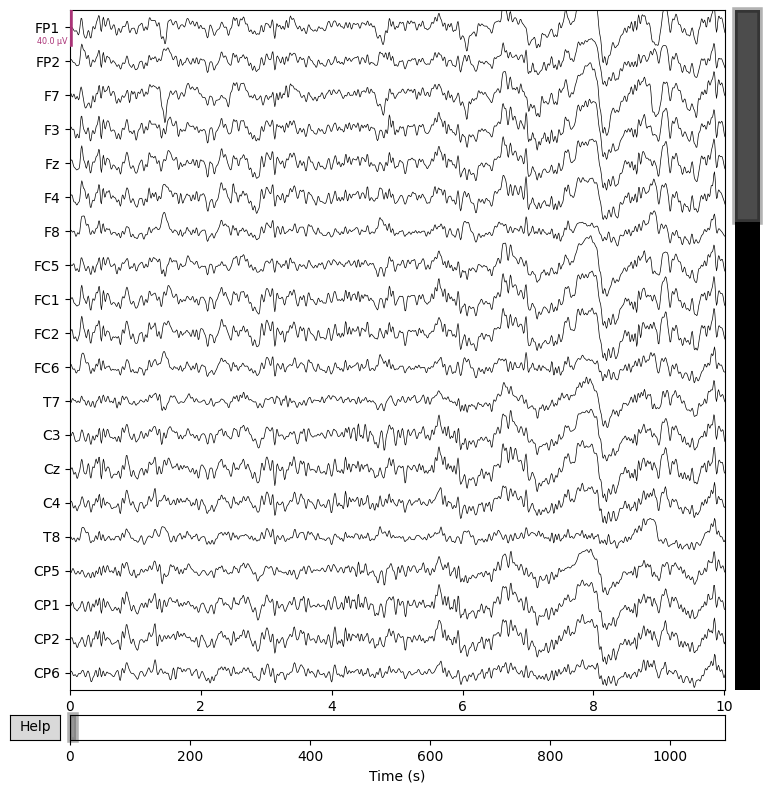

In [ ]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

## Epochs

Para segmentar los datos en épocas, necesitamos marcadores de eventos. Normalmente, estos se almacenan en el objeto `raw`; en MNE, en un canal de estímulos.

In [ ]:
events = mne.find_events(raw)

903 events found on stim channel STI 014
Event IDs: [100 200]


`events` es simplemente una matriz (tiempo en muestras, cero, disparador);

In [ ]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

... que podemos visualizar:

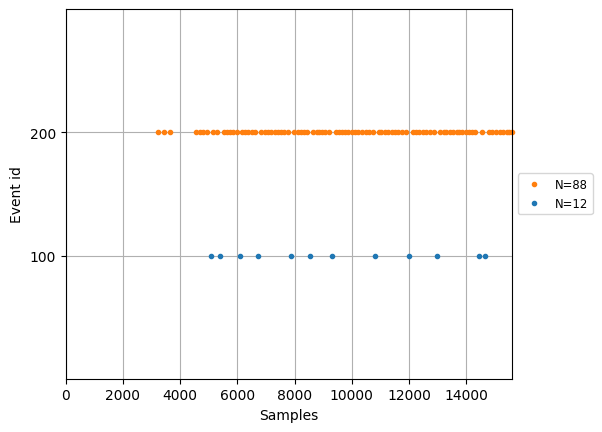

In [ ]:
mne.viz.plot_events(events[:100]);

Para crear un objeto `mne.Epochs`, además del objeto `raw` y la matriz `events`, necesitamos un diccionario con los nombres de las condiciones previstas y los números de disparo correspondientes.

In [ ]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


Las anteriores líneas de código crean épocas a partir de los datos brutos.

Cada época representa un intervalo de tiempo específico alrededor de un evento, lo que facilita el análisis y la visualización de la respuesta del cerebro a estímulos particulares en el experimento.

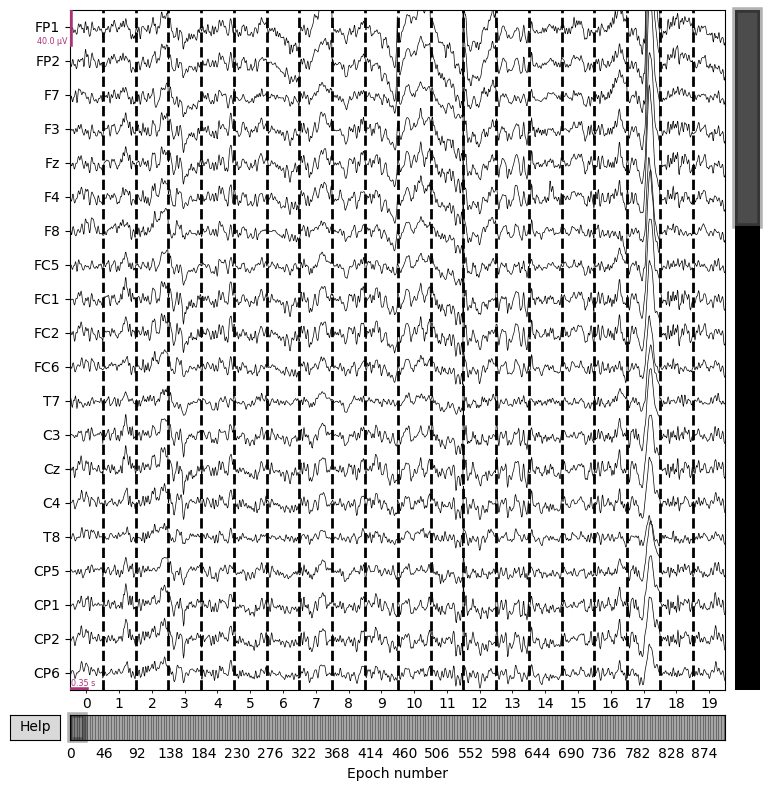

In [ ]:
epochs.plot();

(cambiando al backend en línea ahora para acelerar las cosas.)

In [ ]:
%matplotlib inline

In [ ]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-91-6221a76f7f3f>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


Por supuesto ...

In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-92-9e344f6b5198>:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


El constructor `mne.Epochs` tiene varias opciones, como longitudes de ventana de tiempo y umbrales de rechazo. Investíguelos por su cuenta.

Los objetos `Epochs` también tienen varios métodos, diferentes de los objetos `raw`, por ejemplo, para el baselining.

In [ ]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


Para seleccionar solo una muestra de épocas, está disponible un modo de acceso similar a un diccionario.

In [ ]:
epochs["target"]

Number of events,106
Events,target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


Observa cómo funcionan las etiquetas seleccionadas por barras diagonales ("/").

In [ ]:
epochs["stimulus"]

Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


¿Cómo se ve la actividad segmentada en épocas?

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


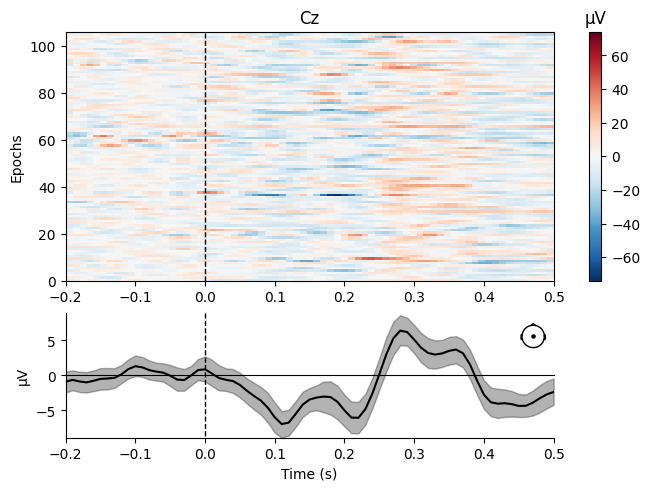

In [ ]:
epochs["target"].plot_image(picks=[13]);

Para asegurarnos de tener tantas pruebas Oddball como estándar, podemos ejecutar...

In [ ]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

Number of events,212
Events,standard/stimulus: 106target/stimulus: 106
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


Podemos escribir el objeto Epochs en el disco para que no tengamos que repetir el preprocesamiento más tarde...

In [ ]:
epochs.save("oddball-epo.fif")  # remember, the data has been cleaned of bad ICs

In [ ]:
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids,
                            tmin=-.5, tmax=1.5, preload=True)  # need longer data segment
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids);  # to speed up things
epochs_for_tfr.save("oddball-long-epo.fif")

Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 201 original time points ...
0 bad epochs dropped
Applying ICA to Epochs instance


<ipython-input-99-38eae2c74f79>:3: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)


    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components
Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 2